The Avengers are a well-known and widely-loved team of superheroes in the Marvel universe that were originally introduced in the 1960's comic book series. The recent Disney movies re-popularized them, as part of the new Marvel Cinematic Universe.

Because the writers killed off and revived many of the superheroes, the team at FiveThirtyEight was curious to explore data from the Marvel Wikia site further. To learn how they collected their data, which is available in their GitHub repository, read the write-up they published on the FiveThirtyEight website.

FiveThirtyEight write up: https://fivethirtyeight.com/features/avengers-death-comics-age-of-ultron/
GitHub link: https://github.com/fivethirtyeight/data/tree/master/avengers

In [1]:
import pandas as pd

avengers = pd.read_csv("./data/avengers.csv")
avengers.head(5)
              
avengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
URL                            173 non-null object
Name/Alias                     163 non-null object
Appearances                    173 non-null int64
Current?                       173 non-null object
Gender                         173 non-null object
Probationary Introl            15 non-null object
Full/Reserve Avengers Intro    159 non-null object
Year                           173 non-null int64
Years since joining            173 non-null int64
Honorary                       173 non-null object
Death1                         173 non-null object
Return1                        69 non-null object
Death2                         17 non-null object
Return2                        16 non-null object
Death3                         2 non-null object
Return3                        2 non-null object
Death4                         1 non-null object
Return4                        1 non-null

### Remove unreliable data

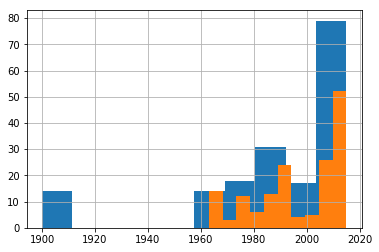

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline  
true_avengers = pd.DataFrame()

# Year represents year that the character was introduced into the Marvel Universe
avengers['Year'].hist()


# Avengers comics were not introduced until 1960, so we need to remove the characters with unreliable year values
true_avengers = avengers[avengers['Year'] >= 1960]

true_avengers['Year'].hist()

### Get total number of deaths for each avengers character

In [5]:
true_avengers['Deaths'] = true_avengers['Death1'].apply(convert_to_num) + true_avengers['Death2'].apply(convert_to_num) + true_avengers['Death3'].apply(convert_to_num) + true_avengers['Death4'].apply(convert_to_num) + true_avengers['Death5'].apply(convert_to_num)

/Users/katherine.mello/.pyenv/versions/3.6.5/envs/dataquest-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
true_avengers['Deaths']

0      1
1      1
2      1
3      1
4      2
5      0
6      1
7      2
8      1
9      1
10     1
11     0
12     0
13     1
14     0
15     1
16     1
17     0
18     2
19     1
20     2
21     1
22     1
23     0
24     0
25     0
26     0
27     0
28     0
29     3
      ..
143    1
144    0
145    0
146    0
147    0
148    0
149    0
150    1
151    0
152    1
153    1
154    1
155    1
156    1
157    0
158    0
159    0
160    0
161    0
162    0
163    0
164    1
165    0
166    0
167    0
168    0
169    0
170    0
171    0
172    0
Name: Deaths, Length: 159, dtype: int64

### Check the accuracy of the "Years since joining" column

In [8]:
# assuming data is from 2015
joined_accuracy_count  = int()

for idx, row in true_avengers.iterrows():
    if (row['Years since joining'] == 2015 - row['Year']):
        joined_accuracy_count += 1

In [9]:
joined_accuracy_count

159

In [11]:
true_avengers.shape[0]

159